# (5주차) 4월4일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories: [Bigdata]

---

### imports 

In [1]:
#!conda install -c conda-forge python-graphviz -y

In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
import tensorflow.experimental.numpy as tnp 

In [5]:
tnp.experimental_enable_numpy_behavior() 

---

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

`-` optimizer를 만들어 최적값을 찾아주는 방법을 생각하게 됨! $\to$ 수식을 몰라도 된다~!

---

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1: opt.apply_gradients()를 이용 

`-` 저번 주 복습

In [9]:
beta = np.linspace(-10,10,100)
loss = (beta/2-1)**2

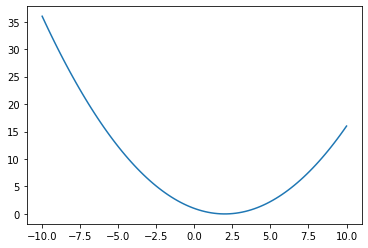

In [10]:
plt.plot(beta,loss)

In [12]:
alpha = 0.01/6

In [13]:
beta=tf.Variable(-10.0)

In [17]:
opt = tf.keras.optimizers.SGD(alpha)

In [15]:
with tf.GradientTape() as tape : 
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정

`-` for문으로 정리

In [26]:
alpha = 0.01/6

beta=tf.Variable(-10.0)

opt = tf.keras.optimizers.SGD(alpha)

In [29]:
for epoc in range(10000) : 
    with tf.GradientTape() as tape : 
        tape.watch(beta)
        loss=(beta/2-1)**2
    slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정
    opt.apply_gradients([(slope,beta)])
    beta                        

In [30]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9987504>

`-` iter1

In [16]:
beta.assign_sub(slope*alpha)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

- iter1은 수식 필요, iter2에서는 옵티마이저 사용
- **opt.apply_gradients()의 입력은 pair의 list**

In [23]:
with tf.GradientTape() as tape : 
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정

In [25]:
opt.apply_gradients([(slope,beta)])  #beta.assign_sub(slope*alpha)와 같은 역할을 해준다.
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.950048>

In [19]:
#opt.apply_gradients?
#변수에 gradient를 적용해서 더 좋은 값을 찾아주는...

`-` tip

In [32]:
opt.learning_rate  #alpha 값임

<tf.Variable 'SGD/learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

In [34]:
opt.lr  #alpha값임

<tf.Variable 'SGD/learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

- 둘의 차이를 보기 위해 주소를 찍어보자.  $\to$  주소가 같으니 똑같은 애들임

In [35]:
id(opt.learning_rate)

140580737133312

In [36]:
id(opt.lr)

140580737133312

---

#### 방법2: opt.minimize()

### 회귀분석 문제

`-` ${\bf y} \approx 4 + 2.5 {\bf x}$

In [7]:
tnp.random.seed(43052)
N = 200
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5
y = 2.5+4*x + epsilon
y_true = 2.5+4*x

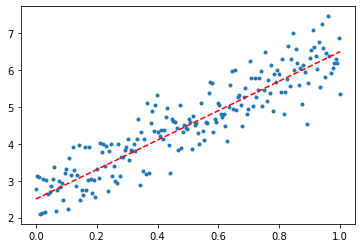

In [8]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'r--')

### 이론적 풀이

#### 풀이1: 스칼라버전

`-` 포인트 
- $S_{xx}=$, $S_{xy}=$
- $\hat{\beta}_0=$, $\hat{\beta}_1=$

#### 풀이2: 벡터버전

`-` 포인트
- $\hat{\beta}=(X'X)^{-1}X'y$

#### 풀이3: 벡터버전, 손실함수의 도함수이용 

`-` 포인트
- $loss'(\beta)=-2X'y +2X'X\beta$
- $\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

### GradientTape를 이용 

#### 풀이1: 벡터버전

`-` 포인트
```python
## 포인트코드1: 그레디언트 테입  
with tf.GradientTape() as tape: 
    loss = 
## 포인트코드2: 미분 
slope = tape.gradient(loss,beta_hat) 
## 포인트코드3: update 
beta_hat.assign_sub(slope*alph) 
```

#### 풀이2: 스칼라버전

`-` 포인트
```python
## 포인트코드: 미분
slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
```

### GradientTape + opt.apply_gradients

#### 풀이1: 벡터버전 

`-` 포인트 
```python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력 
```

#### 풀이2: 스칼라버전 

`-` 포인트
```python
## 포인트코드: 업데이트 
opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)]) ## pair의 list가 입력 
```

### opt.minimize

#### 풀이1: 벡터버전, 사용자정의 손실함수 with lambda

#### 풀이2: 스칼라버전, 사용자정의 손실함수 with lambda

`-` 포인트
```python
## 포인트코드: 미분 & 업데이트 = minimize 
opt.minimize(loss_fn,[beta0_hat,beta1_hat])
```

#### 풀이3: 벡터버전, 사용자정의 (짧은) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    return ??
```

#### 풀이4: 벡터버전, 사용자정의 (긴) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    ??
    ??
    return ??
```

#### 풀이5: 벡터버전, 사용자정의 손실함수 <- tf.losses.MSE 

`-` 포인트
```python
## 포인트코드: 미리구현되어있는 손실함수 이용 
tf.losses.MSE(y,yhat)
```

#### 풀이6: 벡터버전, 사용자정의 손실함수 <- tf.losses.MeaSquaredError

`-` 포인트
```python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스) 
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

### tf.keras.Sequential

`-` $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$ 의 서로다른 표현 

In [ ]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

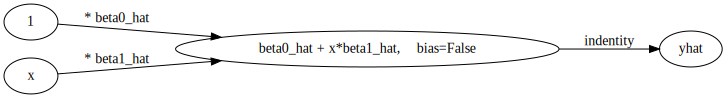

In [ ]:
gv(''' 
    "1" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta0_hat"]
    "x" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta1_hat"]
    "beta0_hat + x*beta1_hat,    bias=False" -> "yhat"[label="indentity"]
    ''')

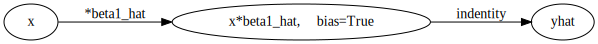

In [ ]:
gv('''
"x" -> "x*beta1_hat,    bias=True"[label="*beta1_hat"] ;
"x*beta1_hat,    bias=True" -> "yhat"[label="indentity"] ''')


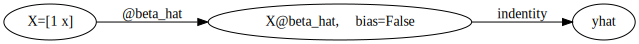

In [ ]:
gv('''
"X=[1 x]" -> "X@beta_hat,    bias=False"[label="@beta_hat"] ;
"X@beta_hat,    bias=False" -> "yhat"[label="indentity"] ''')


#### 풀이1: 벡터버전, 사용자정의 손실함수 

`-` 포인트
```python
## 포인트코드1: 네트워크 생성 
net = tf.keras.Sequential()

## 포인트코드2: 네트워크의 아키텍처 설계 
net.add(tf.keras.layers.Dense(1,input_shape=(2,),use_bias=False)) 

## 포인트코드3: 네트워크 컴파일 = 아키텍처 + 손실함수 + 옵티마이저
net.compile(opt,loss=loss_fn2)

## 포인트코드4: 미분 & update 
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 
```